<a href="https://colab.research.google.com/github/Ademola409/Geospatial_data_science/blob/main/Rank_5Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Change Directory**

In [ ]:
cd '/content/drive/MyDrive/rank-5-accuracy'

/content/drive/MyDrive/rank-5-accuracy


**Import VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

**Load data**

In [ ]:
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
# !unzip imagesDLCV.zip


--2022-10-20 07:28:03--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457845 (1.4M) [application/zip]
Saving to: ‘imagesDLCV.zip’

imagesDLCV.zip      100%[===================>]   1.39M  2.58MB/s    in 0.5s    

2022-10-20 07:28:04 (2.58 MB/s) - ‘imagesDLCV.zip’ saved [1457845/1457845]

Archive:  imagesDLCV.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(1

**Get images from file**

In [ ]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder    
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['long-haired-collie-5766447_1280.jpg',
 'Basketball_(Ball).jpg',
 'download.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'limo-safety-ftr.jpg',
 'spiderweb_1050x700.jpg',
 '1539714414867.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg']

**Load the model**

1/1 [==============================] - 1s 618ms/step


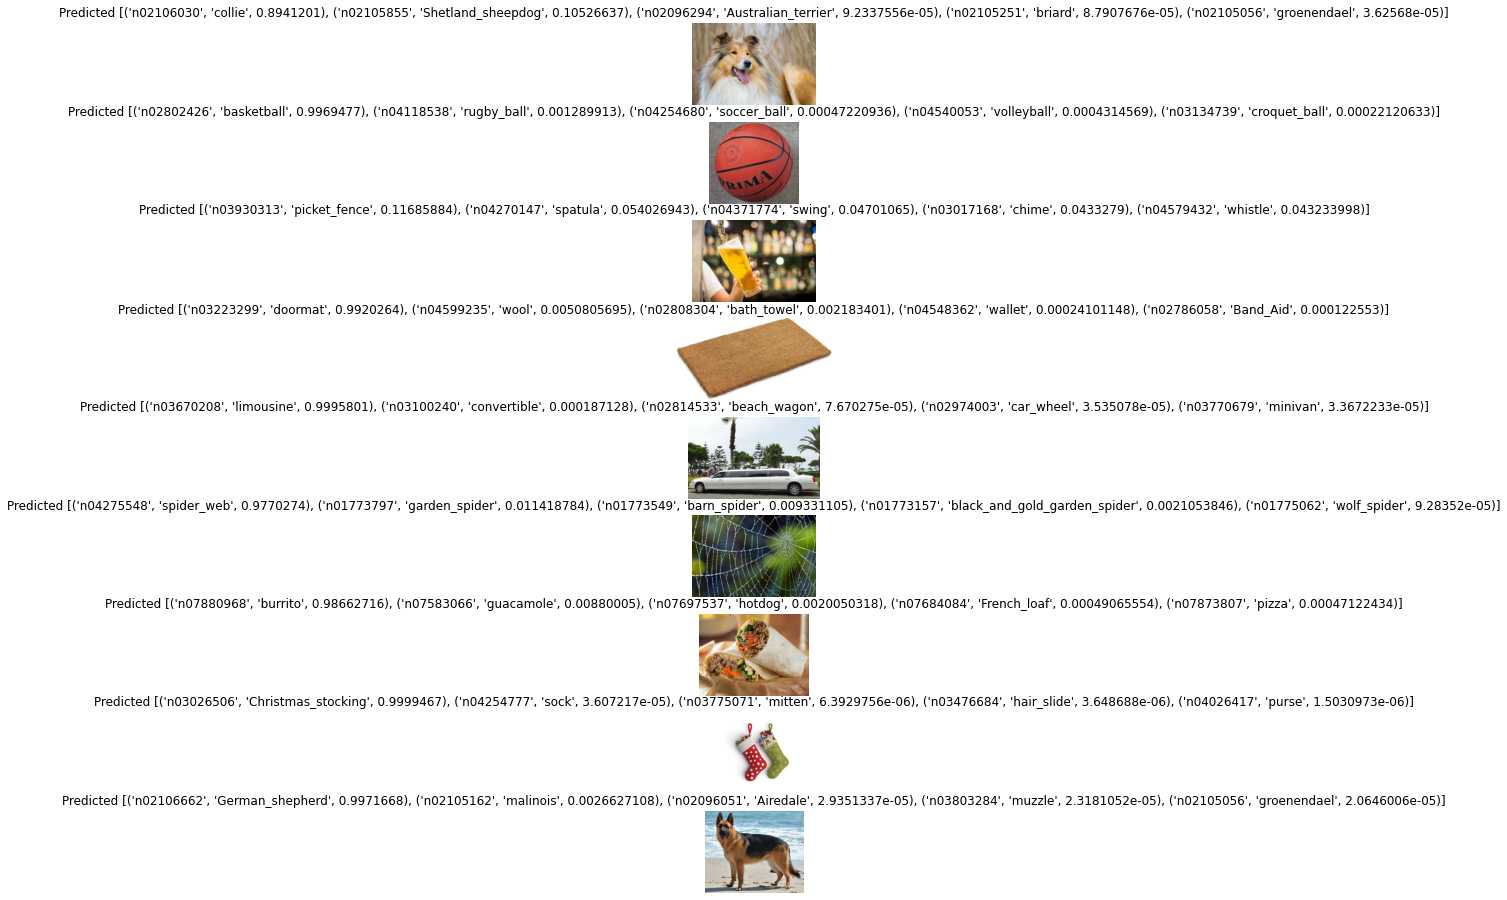

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))
all_top_classes = []

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=5)[0]
    all_top_classes.append([x[1] for x in preditions])
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions)}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
preditions

[('n02106662', 'German_shepherd', 0.9971668),
 ('n02105162', 'malinois', 0.0026627108),
 ('n02096051', 'Airedale', 2.9351337e-05),
 ('n03803284', 'muzzle', 2.3181052e-05),
 ('n02105056', 'groenendael', 2.0646006e-05)]

In [ ]:
all_top_classes

[['collie',
  'Shetland_sheepdog',
  'Australian_terrier',
  'briard',
  'groenendael'],
 ['basketball', 'rugby_ball', 'soccer_ball', 'volleyball', 'croquet_ball'],
 ['picket_fence', 'spatula', 'swing', 'chime', 'whistle'],
 ['doormat', 'wool', 'bath_towel', 'wallet', 'Band_Aid'],
 ['limousine', 'convertible', 'beach_wagon', 'car_wheel', 'minivan'],
 ['spider_web',
  'garden_spider',
  'barn_spider',
  'black_and_gold_garden_spider',
  'wolf_spider'],
 ['burrito', 'guacamole', 'hotdog', 'French_loaf', 'pizza'],
 ['Christmas_stocking', 'sock', 'mitten', 'hair_slide', 'purse'],
 ['German_shepherd', 'malinois', 'Airedale', 'muzzle', 'groenendael']]

In [ ]:
# Create our ground truth labels
ground_truth = ['collie','basketball','beer_glass','doormat','limousine','spider_web','burrito','Christmas_stocking','German_shepherd']

In [ ]:
def getScore(all_top_classes, ground_truth, N):
  # Calcuate rank-N score
  in_labels = 0
  for (i,labels) in enumerate(all_top_classes):
    if ground_truth[i] in labels[:N]:
      in_labels += 1
  return f'Rank-{N} Accuracy = {in_labels/len(all_top_classes)*100:.2f}%'

In [ ]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 88.89%'

**ResNet50**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

1/1 [==============================] - 0s 244ms/step


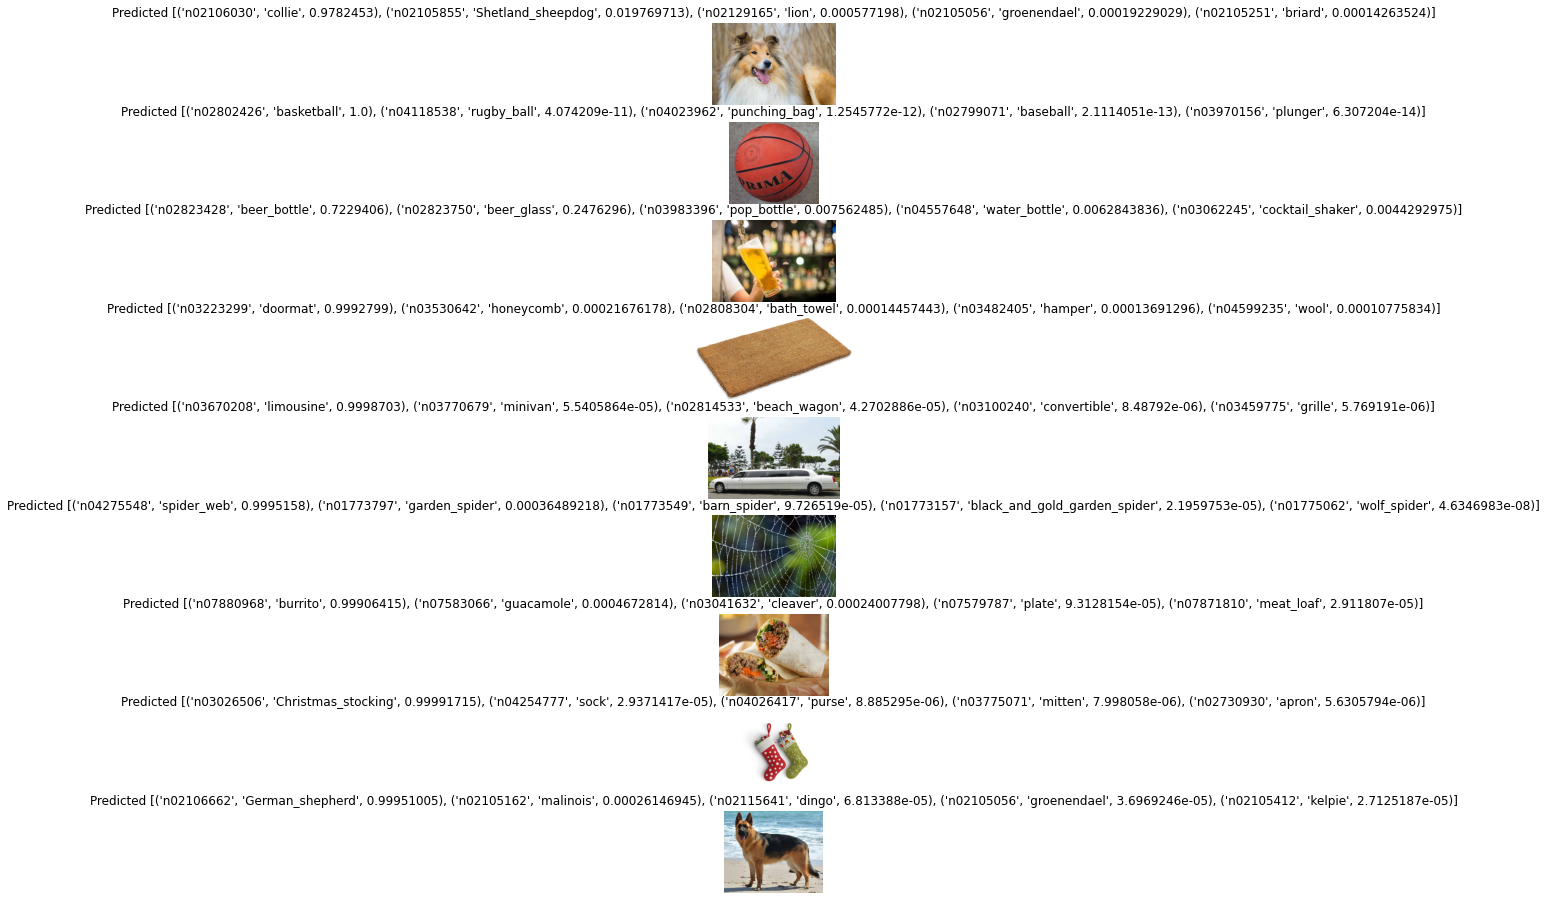

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))
all_top_classes = []

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=5)[0]
    all_top_classes.append([x[1] for x in preditions])
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions)}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
preditions

[('n02106662', 'German_shepherd', 0.99951005),
 ('n02105162', 'malinois', 0.00026146945),
 ('n02115641', 'dingo', 6.813388e-05),
 ('n02105056', 'groenendael', 3.6969246e-05),
 ('n02105412', 'kelpie', 2.7125187e-05)]

In [ ]:
all_top_classes

[['collie', 'Shetland_sheepdog', 'lion', 'groenendael', 'briard'],
 ['basketball', 'rugby_ball', 'punching_bag', 'baseball', 'plunger'],
 ['beer_bottle',
  'beer_glass',
  'pop_bottle',
  'water_bottle',
  'cocktail_shaker'],
 ['doormat', 'honeycomb', 'bath_towel', 'hamper', 'wool'],
 ['limousine', 'minivan', 'beach_wagon', 'convertible', 'grille'],
 ['spider_web',
  'garden_spider',
  'barn_spider',
  'black_and_gold_garden_spider',
  'wolf_spider'],
 ['burrito', 'guacamole', 'cleaver', 'plate', 'meat_loaf'],
 ['Christmas_stocking', 'sock', 'purse', 'mitten', 'apron'],
 ['German_shepherd', 'malinois', 'dingo', 'groenendael', 'kelpie']]

In [ ]:
def getScore(all_top_classes, ground_truth, N):
  # Calcuate rank-N score
  in_labels = 0
  for (i,labels) in enumerate(all_top_classes):
    if ground_truth[i] in labels[:N]:
      in_labels += 1
  return f'Rank-{N} Accuracy = {in_labels/len(all_top_classes)*100:.2f}%'

In [ ]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 100.00%'